<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BA/blob/main/ed_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

![logo](https://www.python.org/static/community_logos/python-powered-h-70x91.png)

# **<font color="DarkBlue">Estadística**

*Dentro del mundo de la ciencia de datos es imprescindible conocer los conceptos y modelos de estadítica. En la actualidad, es posible realizar complejos análisis estadísticos de manera sencilla gracias a lenguajes de programación como Python.*  
  
*La estadística suele ser definida como la ciencia de obtener conclusiones en condiciones de incertidumbre. Se relaciona principalmente con la recolección, análisis e interpretación de datos. En definitiva, la estadística nos brinda los principios fundamentales que nos permiten extraer y entender esa información.*

*La estadística suele ser dividida en dos grandes ramas: **descriptiva** e **inferencial**.*

# **<font color="DarkBlue">Estadística descriptiva**

*Generalmente cuando se inicia el estudio de una variable, lo primero que se hace es describir los datos que se obtienen mediante el muestreo. Es como sacar una “fotografía” de una determinada variable, por ejemplo, el gasto promedio o edad de los clientes.*

*La idea general, **no es hacer ningún tipo de inferencia o predicción** (lo cual corresponde a la estadística inferencial), si no determinar cuál es la situación actual de la variable y realizar un análisis preliminar. Esto nos permite como primera aproximación, si  se ha cumplido con el plan de negocio definido o para determinar cómo se está comportando las ventas, los retrasos en los pedidos, las roturas, las licencias por enfermedad, etc.*



# **<font color="DarkBlue">Estadística descriptiva con Python**

## **<font color="DarkBlue">Librerías**

### **<font color="DarkBlue">Para análisis estadístico**

In [ ]:
# Operaciones matemáticas y estadísticas
import pandas as pd
import numpy as np
import scipy.stats as sp

### **<font color="DarkBlue">Para gráficos**

In [ ]:
# Visualización
import plotly.express as px
import matplotlib.pyplot as plt

## **<font color="DarkBlue">Generación de números aleatorios**

In [ ]:
# Genero una muestra de números que responden a una distribución normal.
np.random.seed(1)
A = np.random.normal(10,2,size=10000)

***¿Cuántas divisiones (bins) hay que hacer en un histograma?***

[Regla de Sturges](https://es.wikipedia.org/wiki/Regla_de_Sturges)

In [ ]:
int(1+np.log2(10000))

14

Text(0.5, 1.0, 'Histograma distribución normal')

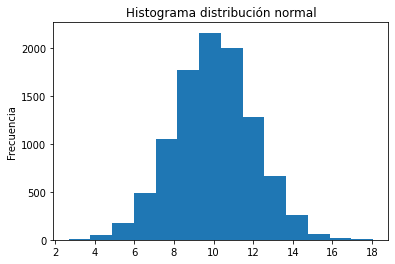

In [ ]:
plt.hist(A, bins=int(1+np.log2(10000)))
plt.ylabel("Frecuencia")
plt.title("Histograma distribución normal")

In [ ]:
A

array([13.24869073,  8.77648717,  8.9436565 , ...,  7.97171237,
        9.87460755,  7.12426021])

In [ ]:
px.histogram(x=A,
             template="gridon",
             title = "Histograma",
             nbins=20,
             text_auto=True,
             labels={"x":"valores"}).update_layout(bargap=0.2)

In [ ]:
px.ecdf(x=A,
        template="gridon",
        title = "Función de distribución acumulada",)

In [ ]:
#Genero una muestra de datos enteros que se distribuyan de manera uniforme.
B = np.random.randint(1,10, size=100000)

In [ ]:
px.histogram(x=B,
             template="gridon",
             title = "Histograma",
             nbins=20,
             text_auto=True,
             labels={"x":"valores"})

## **<font color="DarkBlue">Medidas de centralización**

*Las medidas de tendencia central o centralización, son medidas estadísticas que pretenden resumir en un solo valor a un conjunto de valores. Representan un centro en torno al cual se encuentra ubicado el conjunto de los datos.*

***Nos sirve para ver cómo se sitúan los datos. Son la media, mediana, moda y percentiles.***

### **<font color="DarkBlue">Media**
*La media, o valor medio, es quizá la medida de centralización más importante para una variable. Es el valor obtenido al sumar todos los datos y dividir el resultado entre el número total elementos, es decir, el **promedio aritmético**. Se representa con* $\mu$

\begin{equation}
\mu = \frac{\sum{x_i}}{n}
\end{equation}


In [ ]:
suma_datos = sum(A)
numero_total_de_datos = len(A)
media = round((suma_datos/numero_total_de_datos),2)

print(f"""
La suma del conjuto de datos es: {suma_datos:.2f}
La cantidad de datos sumados es: {numero_total_de_datos}
                    La media es: {media}
""")


La suma del conjuto de datos es: 100195.45
La cantidad de datos sumados es: 10000
                    La media es: 10.02



Con Numpy:

In [ ]:
media = np.mean(A)
media

10.019545313398211

In [ ]:
A.mean()

10.019545313398211

### **<font color="DarkBlue">Mediana**
*La mediana es el valor del  medio cuando los datos están acomodados en orden ascendente (del valor menor al valor mayor). Con un número impar  de observaciones, la mediana es el valor del medio. Con un número par, no hay valor del medio; en este caso se define como el promedio de los valores de las dos observaciones del medio. Se representa con* $\bar{x}$

In [ ]:
A.sort()
long = len(A)
if long % 2 == 0:
    # Si el número es par, se calcula la mediana tomando los valores de las posiciones centrales
    mediana = (A[long//2]+A[(long//2)-1])/2
else:
    # Si el número es impar, se calcula la mediana tomando el valor de la posición central
    mediana = A[long//2]

print(f"""
La cantidad de datos es: {long}
          La mediana es: {mediana}
""")


La cantidad de datos es: 10000
          La mediana es: 10.016908108193508



Con Numpy:

In [ ]:
mediana = np.median(A)
mediana

10.016908108193508

### **<font color="DarkBlue">Metáfora de Bill Gates en un bar**
Se nos pide calcular la media de salarios en un bar, tenemos los registros de 15 voluntarios donde sus sueldos rondaban entre los 25.000 a 45.000 dolares anuales, y tambien se encontraba Bill Gates que tiene un sueldo de 1.000.000 dolares anuales.

In [ ]:
salarios = np.random.randint(25000,45000, 15)
bill_gates = np.array(1000000)
salarios_y_bill_gates = np.union1d(salarios,bill_gates) #une 2 arrays

numero_de_datos = len(salarios_y_bill_gates)
media_s = np.mean(salarios_y_bill_gates)
mediana_s = np.median(salarios_y_bill_gates)

print(f"""
El promedio es de los sueldos es: ${media_s}
 La mediana es de los sueldos es: ${mediana_s}
         La cantidad de datos es: {numero_de_datos}
""")


El promedio es de los sueldos es: $94716.625
 La mediana es de los sueldos es: $33636.5 
         La cantidad de datos es: 16



In [ ]:
px.histogram(x=salarios_y_bill_gates,
             template="gridon",
             title = "Histograma",
             nbins=50,
             text_auto=True,
             labels={"x":"valores"})

### **<font color="DarkBlue">Moda**

*Para datos discretos la moda muestral en el valor con mayor frecuencia. Se representa con* $M_{0}$.
* *Una distribucion **bimodal** de los datos es en la que encontremos dos modas.*

* *En una distribución **trimodal** de los datos es en la que encontramos tres modas.*

* *Para mas de tres modas seria una distribudion **multimodal**.*

* *En el caso de la **distribución uniforme discreta**, cuando todos los datos tienen una misma frecuencia, se le suele llamar como "sin moda" o **amodal**.*

Con Scipy:

In [ ]:
moda = sp.mode(B)
moda

<ipython-input-18-273ba936ea62>:1: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



ModeResult(mode=array([7]), count=array([11277]))

*El valor que más se repite en la muestra es 7 y aparece 11.277 veces.*

`ModeResult(mode=array([7]), count=array([11277]))`

### **<font color="DarkBlue">Percentiles**

*Un percentil es un valor tal que por lo menos “q”  por ciento de las observaciones es menor o igual que este valor, y por lo menos (1 - q) por ciento de las observaciones es mayor.*

In [ ]:
# Percentil 0
np.percentile(A, 0)

2.68711980149041

***Significa que el 0% de las observaciones es menor que el valor. Es el valor mínimo de la muestra.***

In [ ]:
# Percentil 0.25, primer cuartil (Q1).
np.percentile(A, 25)

8.674150316195778

***Significa que el 25% de las observaciones es menor que el valor. Es el primer cuantil ($Q_1$).***

In [ ]:
# Percentil 0.5, segundo cuartil (Q2), coincide con la mediana.
np.percentile(A, 50)

10.016908108193508

***Significa que el 50% de las observaciones es menor que el valor. Es el segundo cuantil ($Q_2$), coincide con la mediana.***

In [ ]:
# Percentil 0.75, tercer cuartil (Q3).
np.percentile(A, 75)

11.343617670940718

***Significa que el 75% de las observaciones es menor que el valor. Es el tercer cuantil ($Q_3$).***

In [ ]:
# Percentil 1, valor máximo.
np.percentile(A, 100)

18.053698089094755

***Significa que el 100% de las observaciones es menor que el valor. Es el valor máximo de la muestra.***

In [ ]:
# Percentiles
np.percentile(A, [0,25,50,75,100])

array([ 2.6871198 ,  8.67415032, 10.01690811, 11.34361767, 18.05369809])

*Los cuartiles son los tres valores de la variable estadística que dividen a un conjunto de datos ordenados en cuatro partes iguales. $Q_1$, $Q_2$ y $Q_3$ determinan los valores correspondientes al 25%, al 50% y al 75% de los datos.*

### **<font color="DarkBlue">Boxplot (o diagrama de caja y bigotes)**

*Los diagramas de caja y bigotes son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles. Estos gráficos nos proporcionan información para el análisis estadístico y son útiles para encontrar valores atípicos y comparar conjunto de datos.*

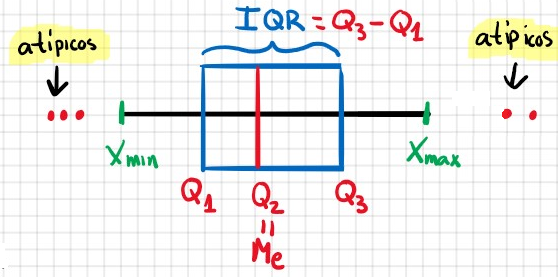

Cuartiles con Numpy
 
1er cuartil: 8.674150316195778
2do cuartil: 10.016908108193508
3er cuartil: 11.343617670940718



Text(0.5, 1.0, 'Boxplot / Diagrama de Caja y Bigotes')

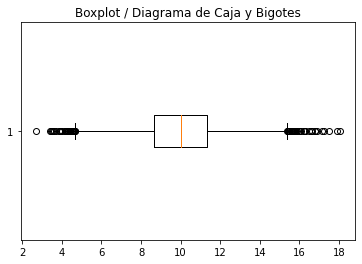

In [ ]:
print('Cuartiles con Numpy')
print(f"""
1er cuartil: {np.quantile(A,0.25)}
2do cuartil: {np.quantile(A,0.50)}
3er cuartil: {np.quantile(A,0.75)}
""")

plt.boxplot(A, vert=False)
plt.title("Boxplot / Diagrama de Caja y Bigotes")

* *La caja indica dónde están los valores centrales (entre el primer cuartil y el tercero). Por el debajo del borde inferior de la caja ($Q_1$) queda un 25% de los datos. El borde superior de la caja lo define el percentil 75 ($Q_3$), por encima de el quedan el 25% de los datos mayores. La caja abarga el 50% de los datos.*

* *La raya indica la mediana (percentil 50), el dato que se encuentra en el medio (mediana).*

* *El rango intercuartílico es el tamaño de la caja. En estadística descriptiva, se le llama **rango intercuartílico**, a la diferencia entre el tercer cuartil ($Q_3$) y el primer cuartil ($Q_1$) de una distribución de datos.*

$$RIC = Q_3-Q_1$$

* *El bigote es 1,5 veces el rango intercurtílico.*

$$\begin{split}outlier\begin{cases}
    min=Q_1−1.5∗RIC \\
    max=Q_3+1.5∗RIC
\end{cases}\end{split}$$

In [ ]:
RIC=np.percentile(A, 75)-np.percentile(A, 25)
RIC

2.66946735474494

In [ ]:
#Bigote inferior
np.percentile(A, 25)-1.5*RIC   #dónde comienza el bigote.

4.669949284078368

In [ ]:
#Bigote superior
np.percentile(A, 75)+1.5*RIC   #dónde termina el bigote.

15.347818703058127

In [ ]:
# boxplot con plotly
px.box(y=A,
       template="gridon",
       labels={"y":"valores"})

In [ ]:
px.box(x=A,
       template="gridon",
       labels={"x":"valores"})

***Lo que supera 1.5 veces por abajo del primer curtil o 1.5 veces por arriba del tercer cuartil se llama outlier (valor fuera de lugar o atípico).***

## **<font color="DarkBlue">Medidas de dispersión**

Después de comprender las medidas de centralización, generalmente se pretende conocer qué tan divergentes son los datos en función de la ubicación central.

* La **varianza** y **desviación estándar** indican si los valores se desplazan mucho o poco con respecto de la media.

* El **coeficiente de variación** mide la variabilidad relativa entre la desviación estándar y la media.

### **<font color="DarkBlue">Varianza**
*La varianza es la medida de dispersión más utilizada. Se basa en la diferencia entre el valor de cada observación y la media. Si se desea calcular la varianza muestral, las desviaciones respecto de la media se elevan al cuadrado, para eliminar el efecto de las puntuaciones negativas. Luego se deben sumar cada una de las diferencias y dividirse entre n-1. La varianza de una muestra se representa con* $s^2$

\begin{equation}
s^2 = \frac{\sum{(x_i-\mu)^2}}{n-1}
\end{equation}

In [ ]:
varianza = np.var(A)
round(varianza)

4

### **<font color="DarkBlue">Desviación Estandar**

*La desviación estándar se define como la raíz cuadrada de la varianza muestral. La varianza de una muestra se representa con* $s$

\begin{equation}
s = \sqrt\frac{\sum{(x_i-\mu)^2}}{n-1}
\end{equation}

In [ ]:
desviacion_estandar = np.std(A)
round(desviacion_estandar)

2

### **<font color="DarkBlue">Coeficiente de variación**

El coeficiente de variación o coeficiente de variación de Pearson, es una medida que indica la **dispersión relativa** de una muestra.

\begin{equation}
cv = \frac{s}{\mu}
\end{equation}

In [ ]:
coeficiente_de_variacion = desviacion_estandar / media

print(f"""
                   La media es: {media}
     La desviación estandar es: {desviacion_estandar}
El coeficiente de variación es: {coeficiente_de_variacion}
""")


                   La media es: 10.019545313398211
     La desviación estandar es: 1.997571687376097 
El coeficiente de variación es: 0.19936749871323292



Con Scipy:

In [ ]:
sp.variation(A)

0.19936749871323292

## **<font color="DarkBlue">Medidas de posición (asimetría y curtosis)**

### **<font color="DarkBlue">Coeficiente de asimetría**

*El **coeficiente de asimetría** es una medida que indica la simetría de la distribución respecto a la media.*

* *Si el coeficientede asimetría es igual a 0 (**distribución simétrica**), existe la misma cantidad de elementos a la derecha y a la izquierda de la media.*

* *Si el coeficiente es positivo (**asimetría positiva o a la derecha**). Indica que la "cola" a la derecha de la media es más larga que la de la izquierda, es decir, si hay valores más separados de la media a la derecha.*

* *Si el coeficiente es negativo (**asimetria negativa o a la izquierda**) Indica la "cola" a la izquierda de la media es más larga que la de la derecha, es decir, si hay valores más separados de la media a la izquierda.*

Su fórmulas es:
\begin{equation}
ca_{f} = \frac{\sum{(x_i-\mu)^3}}{n * s^3}
\end{equation}



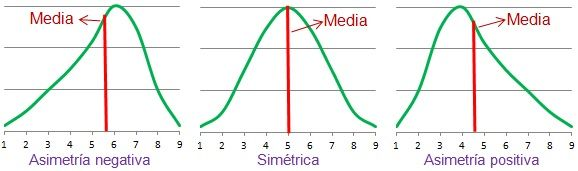

In [ ]:
coeficiente_de_asimetria = sp.skew(A)
coeficiente_de_asimetria

0.02490457128131455

***Valor cercano a 0 (por ser normal), con una muy leve asimetría positiva.***

### **<font color="DarkBlue">Curtosis**

La **curtosis** (o apuntamiento) es una medida que mide cuán apuntada o achatada está una distribución. Este coeficiente indica la cantidad de datos que hay cercanos a la media.

* Si la curtosis es igual a 0 (**Mesocúrtica**). La distribución es normal.
* Si la curtosis es mayor a 0 (**Leptocúrtica**). Los datos están muy concentrados en la media, siendo una curva muy apuntada.
* Si la curtosis es menor a 0 (**Platicúrtica**). Muy poca concentración de datos en la media, siendo una curva achatada.

Su fórmulas es:
\begin{equation}
c = \frac{\sum{(x_i-\mu)^4}}{n * s^4}-3
\end{equation}

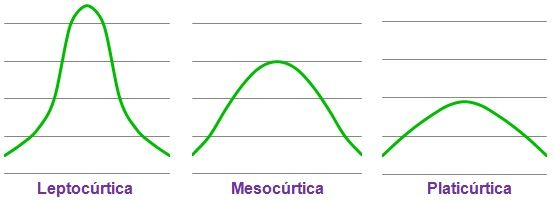

In [ ]:
curtosis = sp.kurtosis(A)
curtosis

0.028669537652855848

***Valor cercano a 0 por ser normal.***